In [19]:
%load_ext autoreload
%autoreload 2
from classification.classifier import Classifier
from ga.ga import GeneticAlgorithm, Individual
from ga.fitness import log_prob_fitness
from hmm.hmm import random_left_right_hmm_params
from data.digits import load_dataset
from ga.crossover import mean_crossover, single_point_crossover
from ga.mutation import constant_uniform_mutation
from ga.selection import pairwise_fittest
import pprint
import numpy
from ga.ga import hmm2genes
import matplotlib as mpl
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[<ga.ga.Individual object at 0x000001A669900D90>, <ga.ga.Individual object at 0x000001A669903010>, <ga.ga.Individual object at 0x000001A669542B30>, <ga.ga.Individual object at 0x000001A666187610>, <ga.ga.Individual object at 0x000001A6683376A0>, <ga.ga.Individual object at 0x000001A668334520>, <ga.ga.Individual object at 0x000001A668337580>, <ga.ga.Individual object at 0x000001A666187E50>, <ga.ga.Individual object at 0x000001A668337430>, <ga.ga.Individual object at 0x000001A6699022C0>, <ga.ga.Individual object at 0x000001A668337760>, <ga.ga.Individual object at 0x000001A668337880>, <ga.ga.Individual object at 0x000001A668336B90>, <ga.ga.Individual object at 0x000001A668335F90>, <ga.ga.Individual object at 0x000001A669902FB0>, <ga.ga.Individual object at 0x000001A666187C10>, <ga.ga.Individual object at 0x000001A669903B80>, <ga.ga.Individual object at 0x000001A6699015D0>, <ga.ga.Individual object at 0x000001A669902BF0>, <ga.ga.Individual object at 0x000001A669542710>]


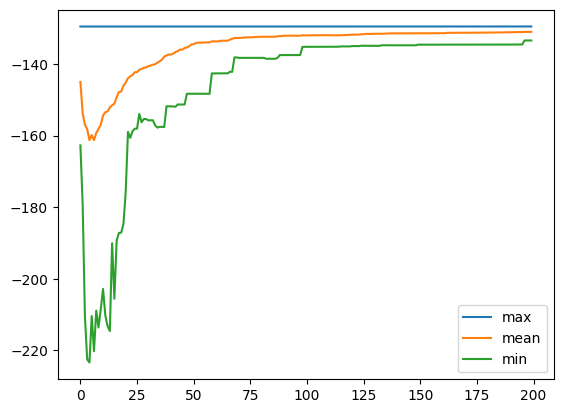

In [21]:
training_data = load_dataset(dataset='train')
n_samples = 12
n_generations=200
n_states=4
n_symbols = 128
alphabet = [i for i in range(128)]
pop_size = 20

Individual.initialize_class(n_states=n_states,n_symbols=n_symbols)

def train_for_n_gen(individuals, samples, n_generations: int):
    for i in range(len(individuals)):
        individual = individuals[i]
        hmm = individual.to_hmm()
        improved_hmm = hmm.fit(sequences=samples, max_iterations=n_generations)
        individuals[i] = hmm2genes(improved_hmm)
    return individuals


distances_global = []
def calc_distance_callback(ga: GeneticAlgorithm):
    distances = []
    for i in range(ga.population_size-1):
        for j in range(i+1, ga.population_size):
            a = ga.population[i].genes
            b = ga.population[j].genes

            dist = numpy.linalg.norm(a - b)
            distances.append(dist)

    avg_distance = sum(distances)/len(distances) 
    distances_global.append(avg_distance)






mutation_func = constant_uniform_mutation(0.5, 0.5)


for digit in range(1):
    samples = training_data[digit][:n_samples]
    fitness_func = log_prob_fitness(samples)
    initial_population=[Individual() for i in range(pop_size)]

    initial_population = train_for_n_gen(initial_population, samples, 1)
    print(initial_population)


    ga = GeneticAlgorithm(
        initial_population=initial_population,
        n_generations=n_generations,
        fitness_func=fitness_func,
        crossover_func=single_point_crossover,
        mutation_func=mutation_func,
        parent_select_func=pairwise_fittest,
        callbacks=[])

    ga.start()
    ga.plot()

    # plot the distances
    # x = range(ga.n_generations)
    # plt.plot(x, distances_global, label='distance')

    # plt.legend()
    # plt.show()







# print(sum([hmm.log_probability(sample) for sample in samples]) / n_samples)
# better_hmm, history = hmm.fit(sequences=samples, return_history=True, max_iterations=1)

# # print([p/n_samples for p in history.log_probabilities])
# print(history.improvements)


#     # train lots of hidden markov models with baum-welch
#     return their histories

#     def train_multiple_bw(initial_population, samples, n_iterations):
#         hmms = [individual.to_hmm() for individual in initial_population]
#         histories = []
#         for hmm in hmms:
#             improved_hmm, history = hmm.fit(samples)
#             histories.append(history)


# states [{distribution.parameters}]







In [ ]:
training_data = load_dataset(dataset='train')
n_samples = 12
n_generations=10
n_states=4
alphabet = [i for i in range(128)]
pop_size = 10

new_individual= individual_factory(
    n_states=n_states,
    alphabet=alphabet,
    hmm_param_generator= random_left_right_hmm_params
)


mutation_func = constant_uniform_mutation(0.1, 0.5)


for digit in range(1):
    samples = training_data[digit][:n_samples]
    fitness_func = log_prob_fitness(samples)
    initial_population=[new_individual() for i in range(pop_size)]

    ga = GeneticAlgorithm(
        initial_population=initial_population,
        n_generations=n_generations,
        fitness_func=fitness_func,
        crossover_func=mean_crossover,
        mutation_func=mutation_func,
        parent_select_func=pairwise_fittest)

    ga.start()
    ga.plot()
    

In [ ]:


initial_population

# Every category needs its own genetic algorithm
# Die Fitness Function ist für alle Buckets ja unterschiedlich :(((())))
# genetic algorithms
for i in range(10):
    # fitness_func = fixed_sample_fitness_func(samples=)

# generate Genetic Algorithm